In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Konfigurace vizualizace dat
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 7.0)
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 15

### Běh na star.fit.cvut.cz

In [25]:
starrun = pd.read_csv('./star-run.csv')
starrun

,filename,validity,upper_bound,solution_length,solution,iterations,elapsed
0,test/fixtures/kun01.txt,valid,15,11,(2:2);(4:1);(3:3);(2:1);(0:0);(2:1);(4:0);(3:2...,0,0.036712
1,test/fixtures/kun02.txt,valid,12,12,(4:4);(2:3);(3:1);(2:3);(1:1);(3:2);(4:0);(2:1...,0,0.051570
2,test/fixtures/kun03.txt,valid,13,11,(3:3);(4:1);(6:0);(5:2);(3:3);(2:5);(0:6);(2:5...,0,0.434325
3,test/fixtures/kun04.txt,valid,14,11,(3:3);(4:1);(6:0);(5:2);(3:3);(2:5);(0:6);(2:5...,0,0.091324
4,test/fixtures/kun05.txt,valid,14,11,(3:3);(4:1);(6:0);(5:2);(3:3);(2:5);(0:6);(2:5...,0,0.273317
5,test/fixtures/kun06.txt,valid,14,13,(4:4);(3:2);(1:3);(2:1);(4:0);(2:1);(3:3);(4:1...,0,0.045275
6,test/fixtures/kun07.txt,valid,12,12,(4:4);(2:3);(3:1);(2:3);(1:1);(3:2);(4:0);(2:1...,0,0.414493
7,test/fixtures/kun08.txt,valid,16,11,(3:3);(4:1);(6:0);(5:2);(3:3);(2:5);(0:6);(2:5...,0,2.992940
8,test/fixtures/kun09.txt,valid,13,13,(6:6);(5:4);(4:2);(6:1);(4:2);(6:3);(4:4);(2:3...,0,0.111038
9,test/fixtures/kun10.txt,valid,16,15,(6:6);(5:4);(3:5);(1:6);(0:4);(2:3);(1:1);(2:3...,0,3.408350


### Porovnání

In [27]:
comparison = pd.read_csv('./comparison.csv')
comparison

,filename,sequential,task_parallel,data_parallel,mpi
0,../test/fixtures/kun01.txt,0.028218,0.003645,0.010614,0.036712
1,../test/fixtures/kun02.txt,0.017044,0.003832,0.006578,0.051570
2,../test/fixtures/kun03.txt,2.601100,0.135497,0.112243,0.434325
3,../test/fixtures/kun04.txt,0.052444,0.012469,0.006759,0.091324
4,../test/fixtures/kun05.txt,0.052078,0.046045,0.107471,0.273317
5,../test/fixtures/kun06.txt,0.031005,0.003820,0.002675,0.045275
6,../test/fixtures/kun07.txt,0.019723,0.004820,0.010776,0.414493
7,../test/fixtures/kun08.txt,2.742440,0.099850,0.116484,2.992940
8,../test/fixtures/kun09.txt,0.379592,0.064895,0.074875,0.111038
9,../test/fixtures/kun10.txt,14.022900,2.103640,4.702110,3.408350


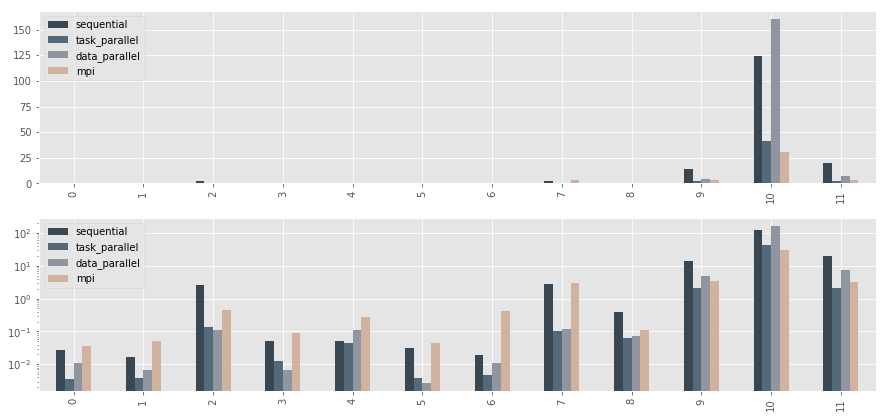

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax = comparison.plot(kind='bar', color=['#394753','#546A7B', '#9095A0', '#D0B29E'], ax=axes[0])
ax2 = comparison.plot(kind='bar', color=['#394753','#546A7B', '#9095A0', '#D0B29E'], ax=axes[1])
ax2.set_yscale('log', nonposy='clip')

### Experimentální část -- Granularita rozdělení

Testováno na souboru `kun12.txt`.

```
  mpirun -np 4 bin/pdpjes test/fixtures/kun12.txt
```

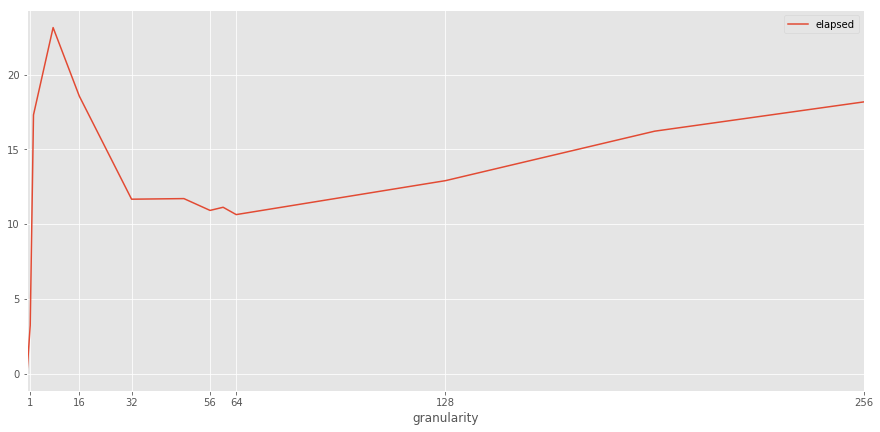

In [46]:
exp_results = pd.DataFrame(data={
    'granularity': [
        0, 1, 2, 8, 16, 32, 
        48, 56, 60, 64, 
        128, 192, 256], 
    'elapsed': [
        0, 3.22, 17.3, 23.14, 18.56, 11.66, 
        11.7, 10.91, 11.12, 10.63, 
        12.9, 16.21, 18.17]
})
exp_results = exp_results.set_index('granularity')
exp_results.plot(xticks=[1, 16, 32, 56, 64, 128, 256])